##UE20CS344 NETWORK ANALYSIS AND MINING
ASSIGNMENT 1 

###TEAM 16
* PES1UG20CS134 - DIVIJA L
* PES1UG20CS150 - GAURAV DNYANESH MAHAJAN
* PES1UG20CS155 - GOVINDA MADHAVA B S
* PES1UG20CS165 - HITHA S

In [74]:
# IMPORTING ALL NECESSARY LIBRARIES 

import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Since the book Ulysses has numerous characters with changing protagonisms and also a lot of dialogues in the first person pronouns, we created our adjacency matrix through a top-level reading and plotted the graph on Gephi.

Yes, the book is complex but it was fun to analyse.

##1A

Uploading the characters as the adjacency matrix

In [75]:
char_adj_mat=pd.read_excel("Book1.xlsx")
char_adj_mat

,Unnamed: 0,Leopold Bloom,Stephen Dedalus,Molly,Martin Cunningham,Gerty,Haines,Power,Bello,Zoe,...,Nosey Flynn,Blazes Boylan,Martha Clifford,Ben Dollard,Buck Mulligan,Nannetti,Kitty O'Shea,Mr Deasy,Lenehan,John Henry Menton
0,Leopold Bloom,0,218,358,22,11,21,11,23,3,...,7,8,14,19,17,3,6,7,30,9
1,Stephen Dedalus,218,0,23,68,24,0,0,0,0,...,9,1,2,2,9,0,0,6,21,0
2,Molly,358,23,0,17,3,0,0,0,0,...,3,0,0,2,7,0,0,0,4,0
3,Martin Cunningham,22,68,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,0
4,Gerty,11,24,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Haines,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Power,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bello,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Zoe,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Lynch,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##1B

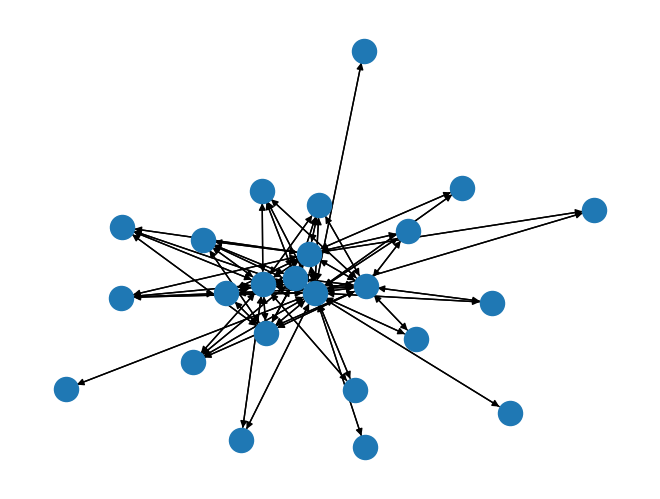

In [76]:
#Uploading the plotted graph from gephi 
G = nx.read_graphml("ulysses.graphml")
nx.draw(G)

In [77]:
#Printing the basic information
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 24
Nodes: ['Leopold Bloom', 'Stephen Dedalus', 'Molly', 'Martin Cunningham', 'Gerty', 'Haines', 'Power', 'Bello', 'Zoe', 'Lynch', 'Cissy', 'Davy Byrne', 'Simon Dedalus', 'Joe Hynes', 'Nosey Flynn', 'Blazes Boylan', 'Martha Clifford', 'Ben Dollard', 'Buck Mulligan', 'Nannetti', "Kitty O'Shea", 'Mr Deasy', 'Lenehan', 'John Henry Menton']

Number of edges in the graph: 132
Edges: [('Leopold Bloom', 'Stephen Dedalus', {'weight': 218.0, 'id': '192'}), ('Leopold Bloom', 'Molly', {'weight': 358.0, 'id': '193'}), ('Leopold Bloom', 'Martin Cunningham', {'weight': 22.0, 'id': '194'}), ('Leopold Bloom', 'Gerty', {'weight': 11.0, 'id': '195'}), ('Leopold Bloom', 'Haines', {'weight': 21.0, 'id': '196'}), ('Leopold Bloom', 'Power', {'weight': 11.0, 'id': '197'}), ('Leopold Bloom', 'Bello', {'weight': 23.0, 'id': '198'}), ('Leopold Bloom', 'Zoe', {'weight': 3.0, 'id': '199'}), ('Leopold Bloom', 'Lynch', {'weight': 9.0, 'id': '200'}), ('Leopold Bloom', 'Cissy', {'weight':

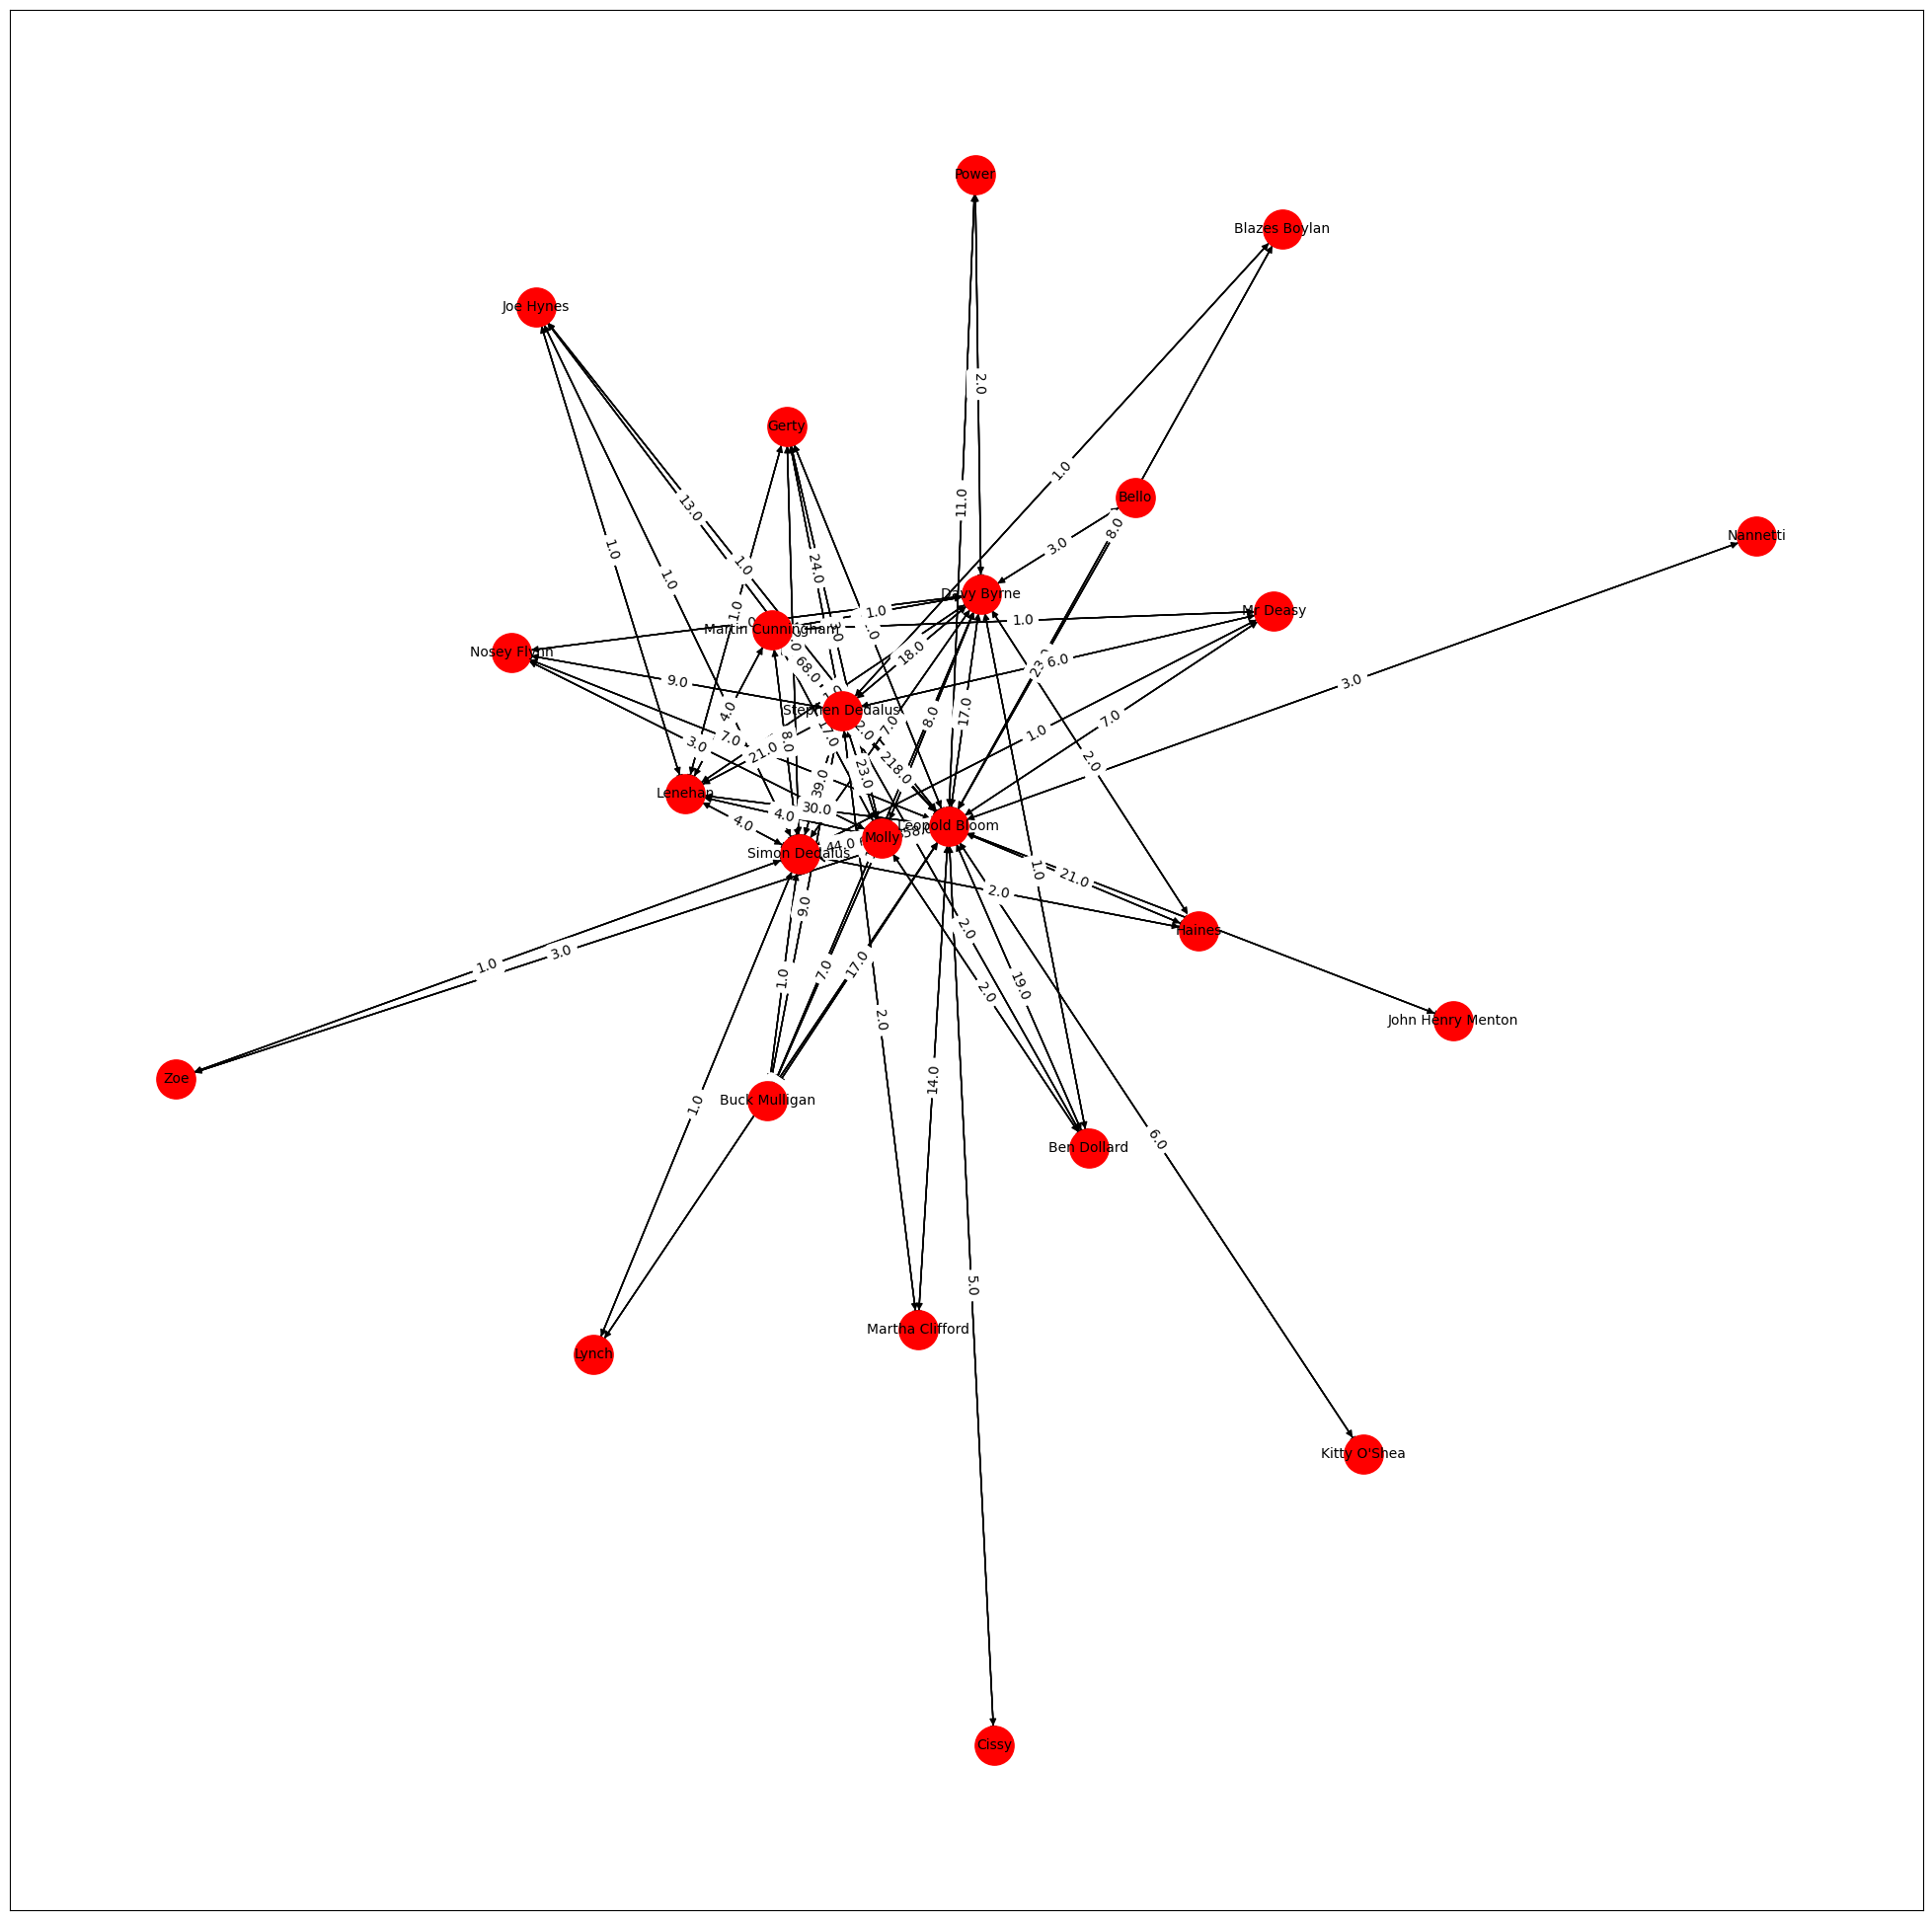

In [78]:
#Plotting a weighted edge directed graph with proper labelling
plt.figure(6, figsize=(25,25))
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=10, node_color="red")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [79]:
list(G.edges(data=True))

[('Leopold Bloom', 'Stephen Dedalus', {'weight': 218.0, 'id': '192'}),
 ('Leopold Bloom', 'Molly', {'weight': 358.0, 'id': '193'}),
 ('Leopold Bloom', 'Martin Cunningham', {'weight': 22.0, 'id': '194'}),
 ('Leopold Bloom', 'Gerty', {'weight': 11.0, 'id': '195'}),
 ('Leopold Bloom', 'Haines', {'weight': 21.0, 'id': '196'}),
 ('Leopold Bloom', 'Power', {'weight': 11.0, 'id': '197'}),
 ('Leopold Bloom', 'Bello', {'weight': 23.0, 'id': '198'}),
 ('Leopold Bloom', 'Zoe', {'weight': 3.0, 'id': '199'}),
 ('Leopold Bloom', 'Lynch', {'weight': 9.0, 'id': '200'}),
 ('Leopold Bloom', 'Cissy', {'weight': 5.0, 'id': '201'}),
 ('Leopold Bloom', 'Davy Byrne', {'weight': 17.0, 'id': '202'}),
 ('Leopold Bloom', 'Simon Dedalus', {'weight': 60.0, 'id': '203'}),
 ('Leopold Bloom', 'Joe Hynes', {'weight': 1.0, 'id': '204'}),
 ('Leopold Bloom', 'Nosey Flynn', {'weight': 7.0, 'id': '205'}),
 ('Leopold Bloom', 'Blazes Boylan', {'weight': 8.0, 'id': '206'}),
 ('Leopold Bloom', 'Martha Clifford', {'weight': 14.

##1C

In [80]:
# DEGREE CENTRALITY
from operator import itemgetter
degc = nx.degree_centrality(G)
#Listing the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Leopold Bloom', 2.0),
 ('Stephen Dedalus', 1.2173913043478262),
 ('Simon Dedalus', 1.1304347826086956),
 ('Davy Byrne', 1.0434782608695652),
 ('Molly', 0.8695652173913043),
 ('Lenehan', 0.6956521739130435),
 ('Martin Cunningham', 0.6086956521739131),
 ('Gerty', 0.43478260869565216),
 ('Buck Mulligan', 0.43478260869565216),
 ('Joe Hynes', 0.34782608695652173),
 ('Nosey Flynn', 0.34782608695652173),
 ('Ben Dollard', 0.34782608695652173),
 ('Mr Deasy', 0.34782608695652173),
 ('Haines', 0.2608695652173913),
 ('Power', 0.17391304347826086),
 ('Bello', 0.17391304347826086),
 ('Zoe', 0.17391304347826086),
 ('Lynch', 0.17391304347826086),
 ('Blazes Boylan', 0.17391304347826086),
 ('Martha Clifford', 0.17391304347826086),
 ('Cissy', 0.08695652173913043),
 ('Nannetti', 0.08695652173913043),
 ("Kitty O'Shea", 0.08695652173913043),
 ('John Henry Menton', 0.08695652173913043)]

In [81]:
# BETWEENESS CENTRALITY
betc = nx.betweenness_centrality(G)
sorted(betc.items(), key=itemgetter(1), reverse=True)

[('Leopold Bloom', 0.5957180500658761),
 ('Stephen Dedalus', 0.08122529644268776),
 ('Simon Dedalus', 0.07035573122529644),
 ('Davy Byrne', 0.05856389986824769),
 ('Molly', 0.015678524374176547),
 ('Lenehan', 0.005533596837944663),
 ('Martin Cunningham', 0.0029644268774703555),
 ('Gerty', 0.0),
 ('Haines', 0.0),
 ('Power', 0.0),
 ('Bello', 0.0),
 ('Zoe', 0.0),
 ('Lynch', 0.0),
 ('Cissy', 0.0),
 ('Joe Hynes', 0.0),
 ('Nosey Flynn', 0.0),
 ('Blazes Boylan', 0.0),
 ('Martha Clifford', 0.0),
 ('Ben Dollard', 0.0),
 ('Buck Mulligan', 0.0),
 ('Nannetti', 0.0),
 ("Kitty O'Shea", 0.0),
 ('Mr Deasy', 0.0),
 ('John Henry Menton', 0.0)]

In [82]:
# CLOSENESS CENTRALITY
closc = nx.closeness_centrality(G)
sorted(closc.items(), key=itemgetter(1), reverse=True)

[('Leopold Bloom', 1.0),
 ('Stephen Dedalus', 0.71875),
 ('Simon Dedalus', 0.696969696969697),
 ('Davy Byrne', 0.6764705882352942),
 ('Molly', 0.6388888888888888),
 ('Lenehan', 0.6052631578947368),
 ('Martin Cunningham', 0.5897435897435898),
 ('Gerty', 0.5609756097560976),
 ('Buck Mulligan', 0.5609756097560976),
 ('Joe Hynes', 0.5476190476190477),
 ('Nosey Flynn', 0.5476190476190477),
 ('Ben Dollard', 0.5476190476190477),
 ('Mr Deasy', 0.5476190476190477),
 ('Haines', 0.5348837209302325),
 ('Power', 0.5227272727272727),
 ('Bello', 0.5227272727272727),
 ('Zoe', 0.5227272727272727),
 ('Lynch', 0.5227272727272727),
 ('Blazes Boylan', 0.5227272727272727),
 ('Martha Clifford', 0.5227272727272727),
 ('Cissy', 0.5111111111111111),
 ('Nannetti', 0.5111111111111111),
 ("Kitty O'Shea", 0.5111111111111111),
 ('John Henry Menton', 0.5111111111111111)]

In [83]:
print('\n sorted pagerank:\n')
pgr=nx.pagerank(G)
sorted(pgr.items(), key=itemgetter(1), reverse=True)


 sorted pagerank:



[('Leopold Bloom', 0.3287717490633086),
 ('Stephen Dedalus', 0.16125377678242395),
 ('Molly', 0.15678565703408787),
 ('Simon Dedalus', 0.061872211369006655),
 ('Martin Cunningham', 0.04349970482044911),
 ('Davy Byrne', 0.027399452421322842),
 ('Lenehan', 0.027089494589486583),
 ('Gerty', 0.018825439486010707),
 ('Buck Mulligan', 0.01705011761634721),
 ('Bello', 0.014689021930420135),
 ('Haines', 0.014292652708890501),
 ('Ben Dollard', 0.013839554708393794),
 ('Nosey Flynn', 0.012426745847910776),
 ('Martha Clifford', 0.011306008663709663),
 ('Joe Hynes', 0.011157867699379686),
 ('Mr Deasy', 0.010904019687616999),
 ('Power', 0.010498369865198497),
 ('Lynch', 0.009418813503459782),
 ('John Henry Menton', 0.009111262183631005),
 ('Blazes Boylan', 0.009095922352258277),
 ("Kitty O'Shea", 0.00815750812242067),
 ('Cissy', 0.007839590102017225),
 ('Zoe', 0.007511305381039113),
 ('Nannetti', 0.007203754061210335)]

##1D

In [84]:
#Global clustering coefficient
nx.average_clustering(G)

0.69693026377809

In [85]:
#Local clustering coefficients of the characters
nx.clustering(G)

{'Leopold Bloom': 0.16996047430830039,
 'Stephen Dedalus': 0.4065934065934066,
 'Molly': 0.6444444444444445,
 'Martin Cunningham': 0.8571428571428571,
 'Gerty': 1.0,
 'Haines': 1.0,
 'Power': 1.0,
 'Bello': 1.0,
 'Zoe': 1.0,
 'Lynch': 1.0,
 'Cissy': 0,
 'Davy Byrne': 0.4393939393939394,
 'Simon Dedalus': 0.4230769230769231,
 'Joe Hynes': 1.0,
 'Nosey Flynn': 1.0,
 'Blazes Boylan': 1.0,
 'Martha Clifford': 1.0,
 'Ben Dollard': 1.0,
 'Buck Mulligan': 1.0,
 'Nannetti': 0,
 "Kitty O'Shea": 0,
 'Mr Deasy': 1.0,
 'Lenehan': 0.7857142857142857,
 'John Henry Menton': 0}

In [86]:
#Converting the graph to undirected 
Undirected_G=G.to_undirected()

##1E

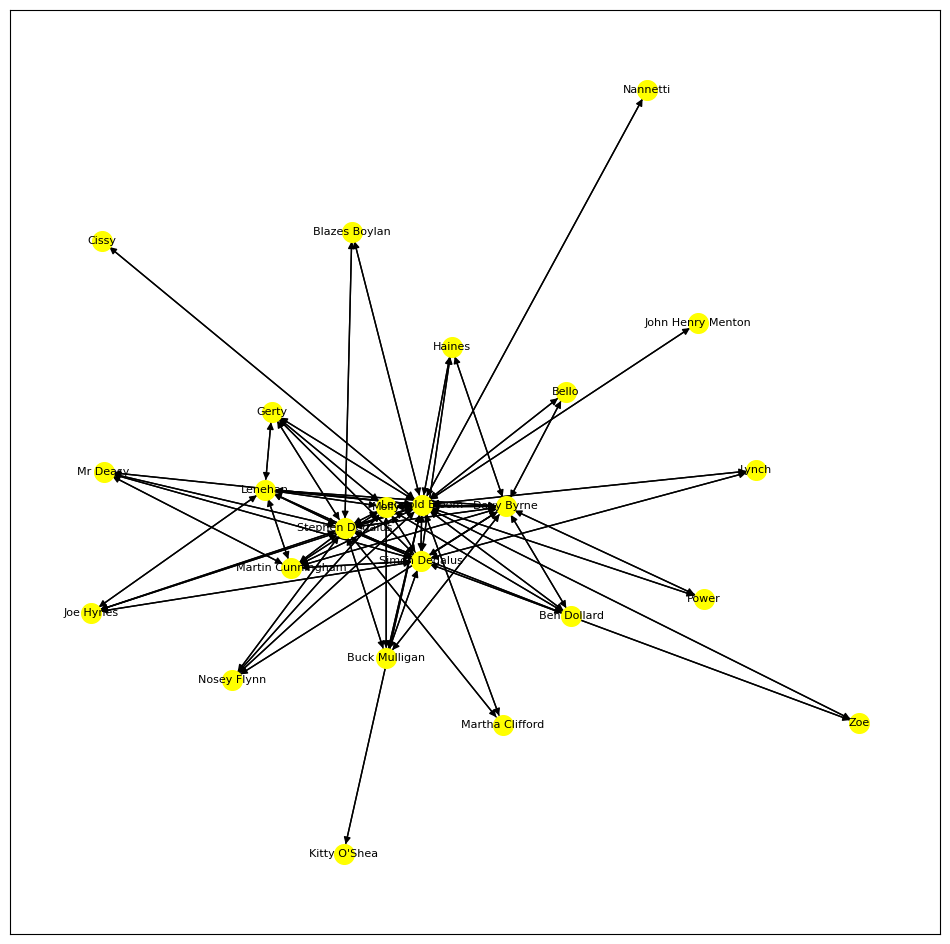

In [87]:
#Clique Percolation Method
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='yellow')

In [88]:
# To search for all maximal cliques in a graph.
list(nx.find_cliques(Undirected_G))

[['Leopold Bloom', 'Haines', 'Davy Byrne', 'Simon Dedalus'],
 ['Leopold Bloom', 'John Henry Menton'],
 ['Leopold Bloom', 'Power', 'Davy Byrne'],
 ['Leopold Bloom', 'Nannetti'],
 ['Leopold Bloom', 'Bello', 'Davy Byrne'],
 ['Leopold Bloom', "Kitty O'Shea"],
 ['Leopold Bloom', 'Zoe', 'Simon Dedalus'],
 ['Leopold Bloom', 'Stephen Dedalus', 'Martha Clifford'],
 ['Leopold Bloom',
  'Stephen Dedalus',
  'Mr Deasy',
  'Martin Cunningham',
  'Simon Dedalus'],
 ['Leopold Bloom',
  'Stephen Dedalus',
  'Molly',
  'Gerty',
  'Lenehan',
  'Simon Dedalus'],
 ['Leopold Bloom', 'Stephen Dedalus', 'Molly', 'Davy Byrne', 'Ben Dollard'],
 ['Leopold Bloom',
  'Stephen Dedalus',
  'Molly',
  'Davy Byrne',
  'Simon Dedalus',
  'Martin Cunningham',
  'Lenehan'],
 ['Leopold Bloom',
  'Stephen Dedalus',
  'Molly',
  'Davy Byrne',
  'Simon Dedalus',
  'Buck Mulligan'],
 ['Leopold Bloom', 'Stephen Dedalus', 'Molly', 'Davy Byrne', 'Nosey Flynn'],
 ['Leopold Bloom', 'Stephen Dedalus', 'Joe Hynes', 'Lenehan', 'Simo

In [89]:
import community
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(Undirected_G, 4))
print(c)

[frozenset({'Martin Cunningham', 'Haines', 'Davy Byrne', 'Lenehan', 'Mr Deasy', 'Joe Hynes', 'Nosey Flynn', 'Gerty', 'Leopold Bloom', 'Molly', 'Stephen Dedalus', 'Buck Mulligan', 'Ben Dollard', 'Simon Dedalus'})]


In [90]:
part = community.best_partition(Undirected_G)
print(part)

{'Leopold Bloom': 0, 'Stephen Dedalus': 1, 'Molly': 0, 'Martin Cunningham': 1, 'Gerty': 1, 'Haines': 0, 'Power': 0, 'Bello': 0, 'Zoe': 0, 'Lynch': 0, 'Cissy': 0, 'Davy Byrne': 1, 'Simon Dedalus': 1, 'Joe Hynes': 1, 'Nosey Flynn': 1, 'Blazes Boylan': 0, 'Martha Clifford': 0, 'Ben Dollard': 0, 'Buck Mulligan': 0, 'Nannetti': 0, "Kitty O'Shea": 0, 'Mr Deasy': 1, 'Lenehan': 1, 'John Henry Menton': 0}


In [91]:
print(community.modularity(part,Undirected_G))

0.07142655677784823


In [92]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Bello',
  'Ben Dollard',
  'Blazes Boylan',
  'Buck Mulligan',
  'Davy Byrne',
  'Gerty',
  'Haines',
  'Joe Hynes',
  'John Henry Menton',
  "Kitty O'Shea",
  'Lenehan',
  'Leopold Bloom',
  'Lynch',
  'Martha Clifford',
  'Martin Cunningham',
  'Molly',
  'Mr Deasy',
  'Nosey Flynn',
  'Power',
  'Simon Dedalus',
  'Stephen Dedalus',
  'Zoe'],
 ['Cissy'],
 ['Nannetti']]

In [93]:
induced = community.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 1]
[(0, 1), (0, 0), (1, 1)]


##1F

In [94]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  24
Edges:  132
Average degree:  5.5


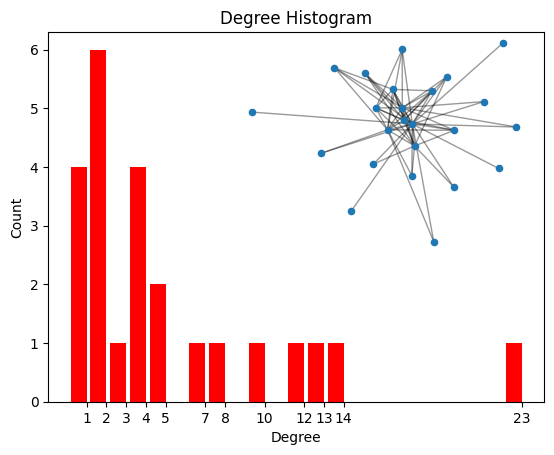

In [95]:
import collections

degree_sequence = sorted([d for n, d in Undirected_G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='Red')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (Undirected_G.subgraph(c) for c in nx.connected_components(Undirected_G))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(Undirected_G)
plt.axis('off')
nx.draw_networkx_nodes(Undirected_G, pos, node_size=20)
nx.draw_networkx_edges(Undirected_G, pos, alpha=0.4)

plt.show()


In [96]:
#SHORTEST PATH
nx.average_shortest_path_length(G)


1.7608695652173914

In [97]:
#SIZE OF LARGEST COMPONENT
a = nx.is_connected(Undirected_G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(Undirected_G)))
s='\n no of connected components: ' +repr(no)
print (s)

CoC=sorted(nx.connected_components(Undirected_G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)


 Is a connected graph: True

 no of connected components: 1

 Connected component length:24

 Connected component :
{'Haines', 'Mr Deasy', 'Lenehan', 'Gerty', 'Molly', 'Simon Dedalus', 'Davy Byrne', 'Bello', "Kitty O'Shea", 'Joe Hynes', 'Buck Mulligan', 'Cissy', 'Ben Dollard', 'Lynch', 'Martin Cunningham', 'John Henry Menton', 'Martha Clifford', 'Stephen Dedalus', 'Blazes Boylan', 'Power', 'Nosey Flynn', 'Zoe', 'Leopold Bloom', 'Nannetti'}


In [98]:
#COMPARING WITH GENERATIVE MODELS TO COMPARE THE GRAPH WITH
nodes=G.number_of_nodes()
nodes

24

In [99]:
#calculate average degree to use with random graph models 
degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree


Node  Leopold Bloom  : Degree is  46
Node  Stephen Dedalus  : Degree is  28
Node  Molly  : Degree is  20
Node  Martin Cunningham  : Degree is  14
Node  Gerty  : Degree is  10


4.916666666666667

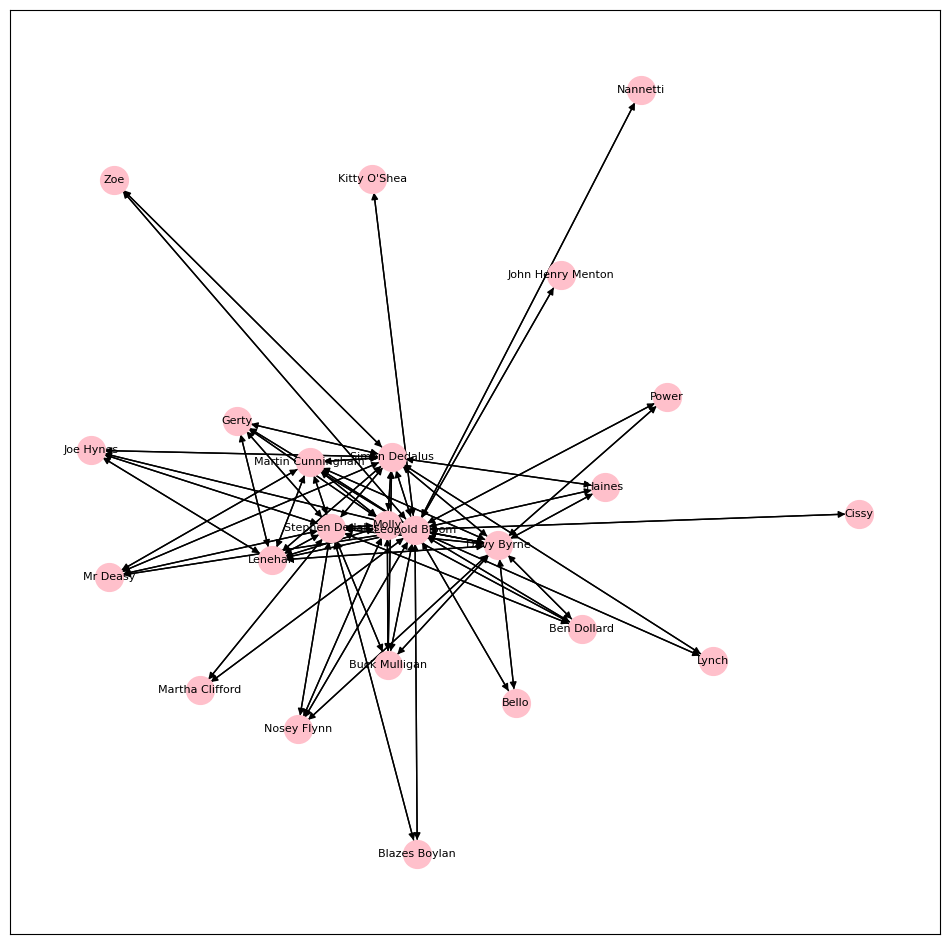

In [100]:
#Original graph
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=400, font_size = 8, node_color='pink')

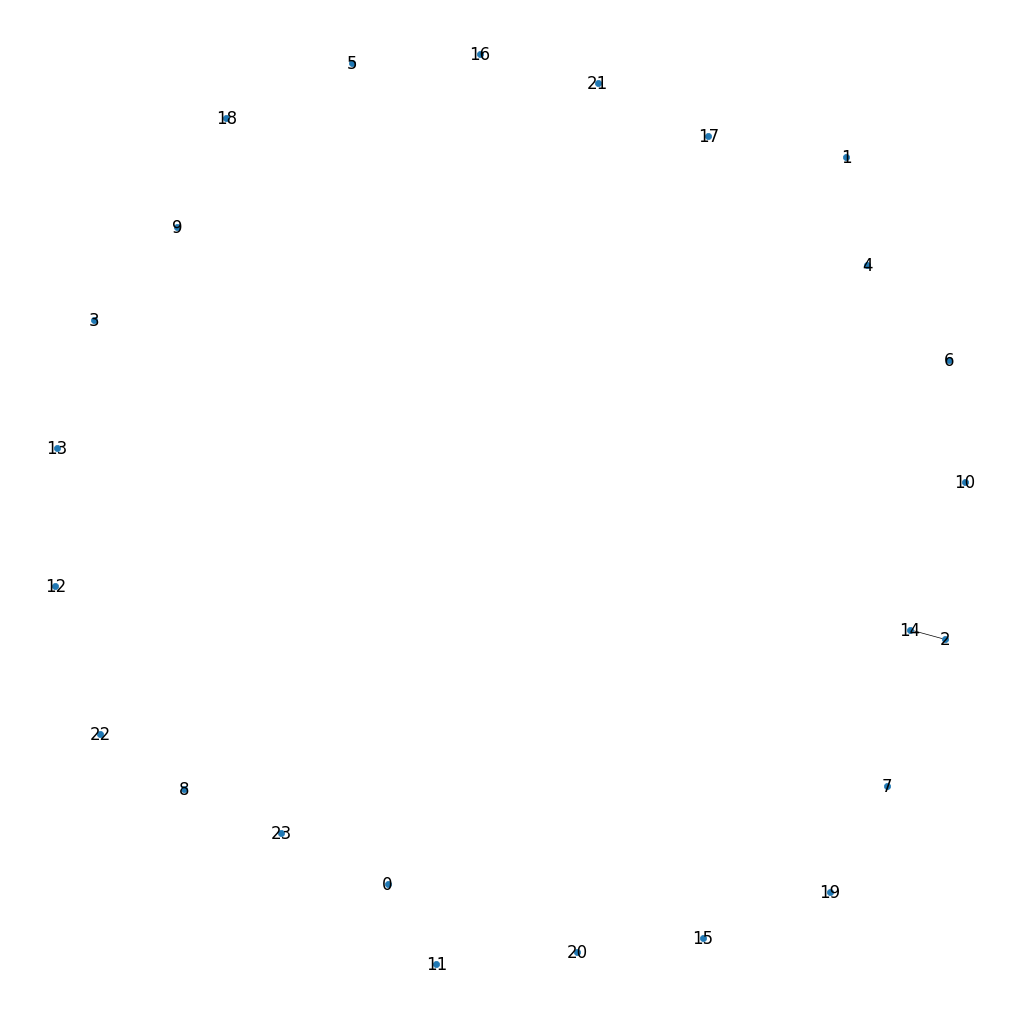

In [101]:
p=avg_degree/(no_nodes-1)
G1 = nx.gnm_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G1, with_labels = True, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

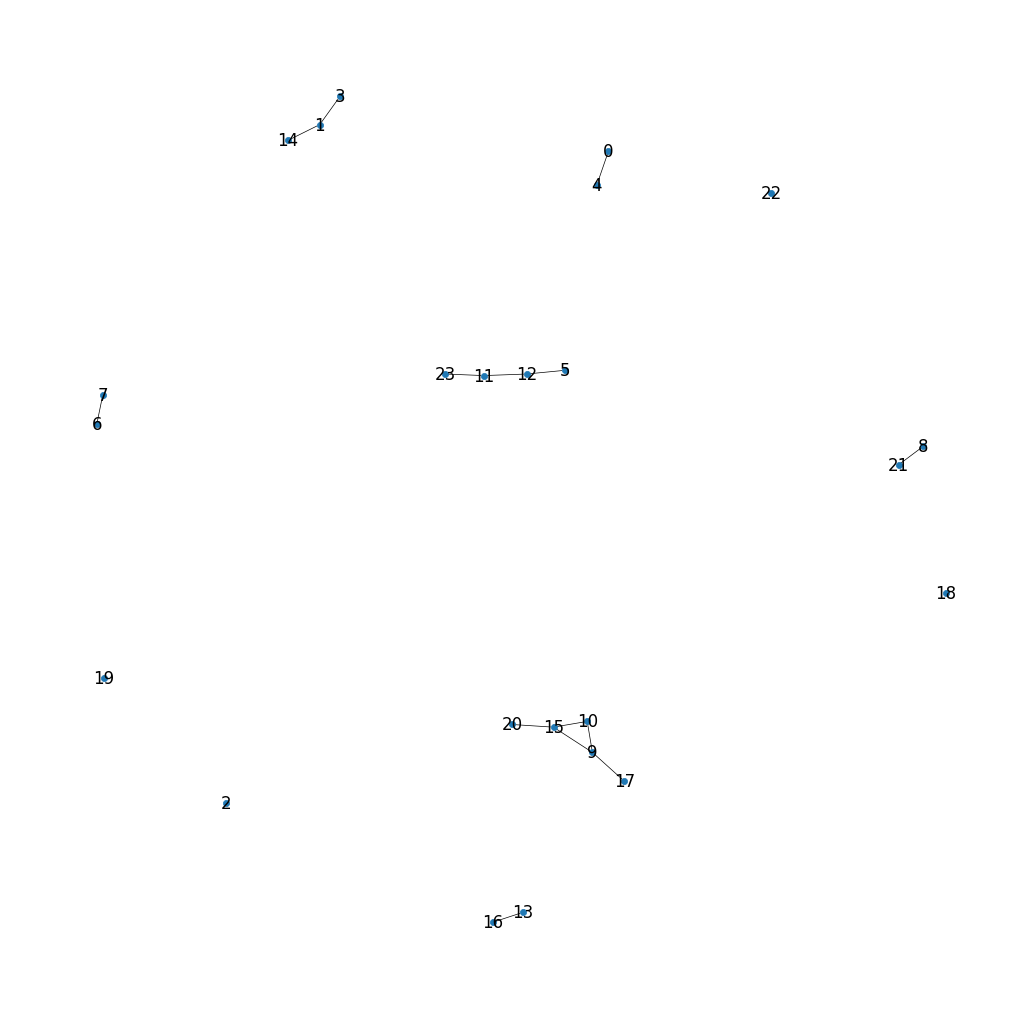

In [102]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = True, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

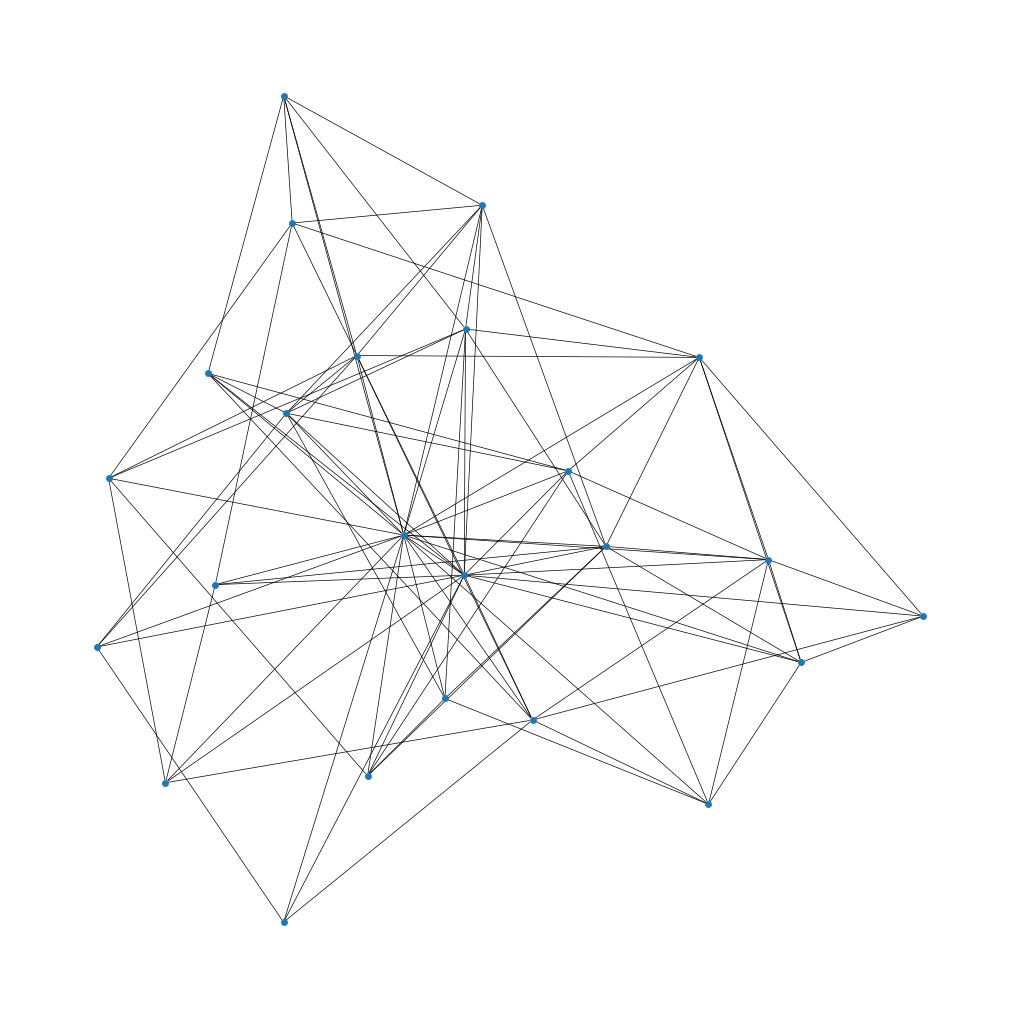

In [103]:
#PREFERENTIAL ATTACHMENT
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

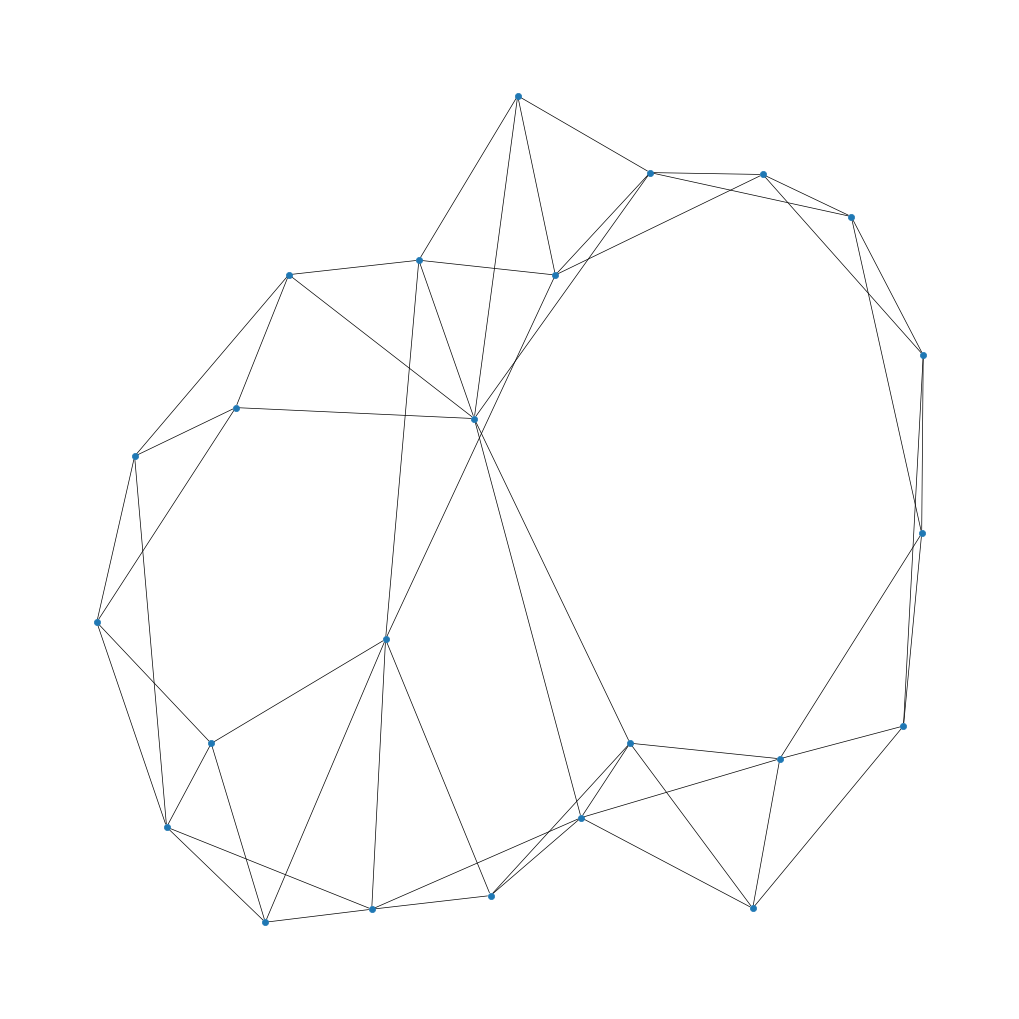

In [104]:
#SMALL WORLD
N = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(N, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [105]:
#FINAL ANALYSIS - CHARACTER STUDY
#Comparing centrality values to determine the protagonist
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
deg_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(deg_list[i])

('Leopold Bloom', 2.0)
('Stephen Dedalus', 1.2173913043478262)
('Simon Dedalus', 1.1304347826086956)
('Davy Byrne', 1.0434782608695652)
('Molly', 0.8695652173913043)


In [106]:
betc = nx.betweenness_centrality(G)
bet_list = sorted(betc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(bet_list[i])

('Leopold Bloom', 0.5957180500658761)
('Stephen Dedalus', 0.08122529644268776)
('Simon Dedalus', 0.07035573122529644)
('Davy Byrne', 0.05856389986824769)
('Molly', 0.015678524374176547)


In [107]:
closc = nx.closeness_centrality(G)
clo_list = sorted(closc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(clo_list[i])

('Leopold Bloom', 1.0)
('Stephen Dedalus', 0.71875)
('Simon Dedalus', 0.696969696969697)
('Davy Byrne', 0.6764705882352942)
('Molly', 0.6388888888888888)


In [108]:
pgr=nx.pagerank(G)
pag_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(pag_list[i])

('Leopold Bloom', 0.3287717490633086)
('Stephen Dedalus', 0.16125377678242395)
('Molly', 0.15678565703408787)
('Simon Dedalus', 0.061872211369006655)
('Martin Cunningham', 0.04349970482044911)


In [109]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

In [110]:

cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [111]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coeff deg and betweenness: PearsonRResult(statistic=0.7972809773616948, pvalue=3.096991231683585e-06)

 Pearson Correlation Coeff deg and closeness: PearsonRResult(statistic=0.9758846042335408, pvalue=4.944374179761625e-16)

 Pearson Correlation Coeff betweennness and closeness: PearsonRResult(statistic=0.9092628030708716, pvalue=7.736567657990835e-10)

 Pearson Correlation Coeff betweennness and eigenvector : PearsonRResult(statistic=0.6022523307717382, pvalue=0.0018453149933689965)


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_16644\1984395486.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


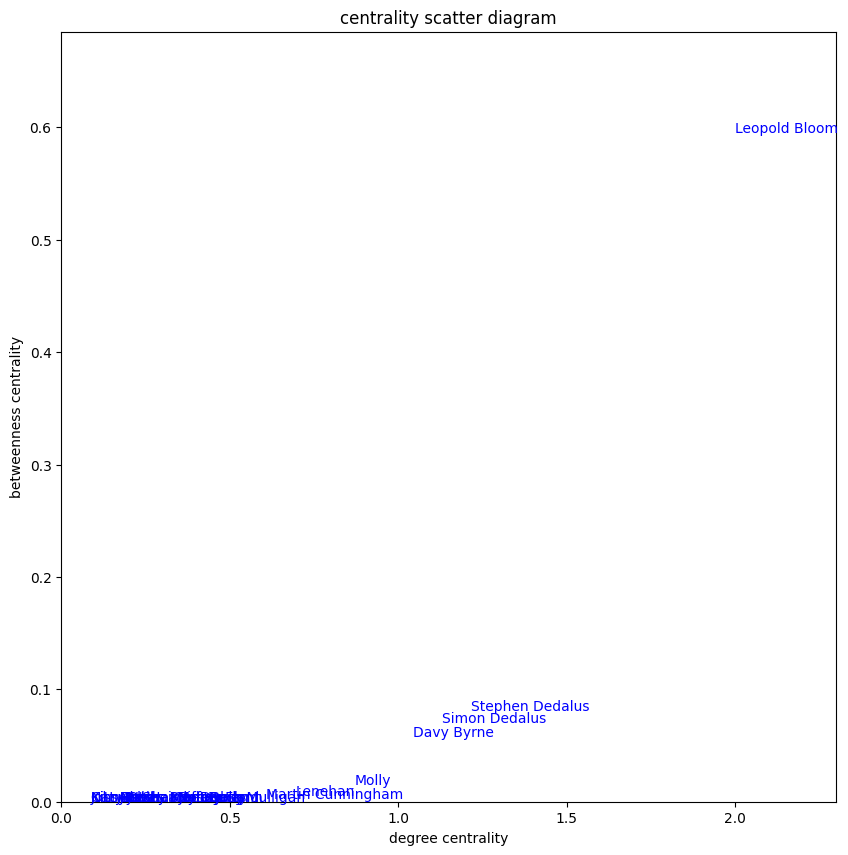

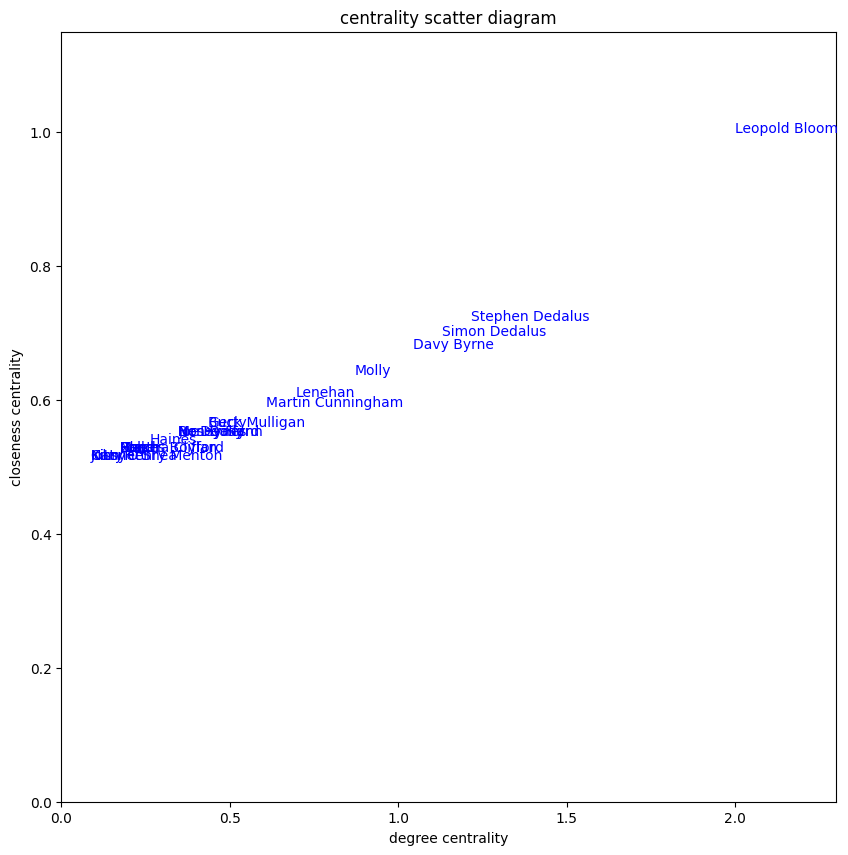

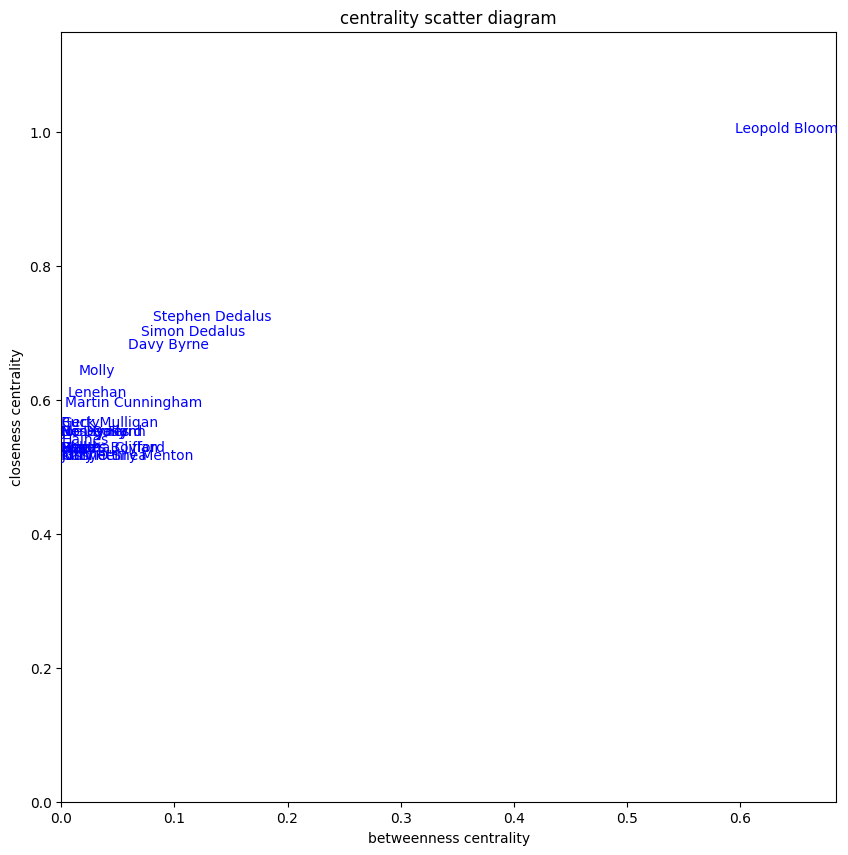

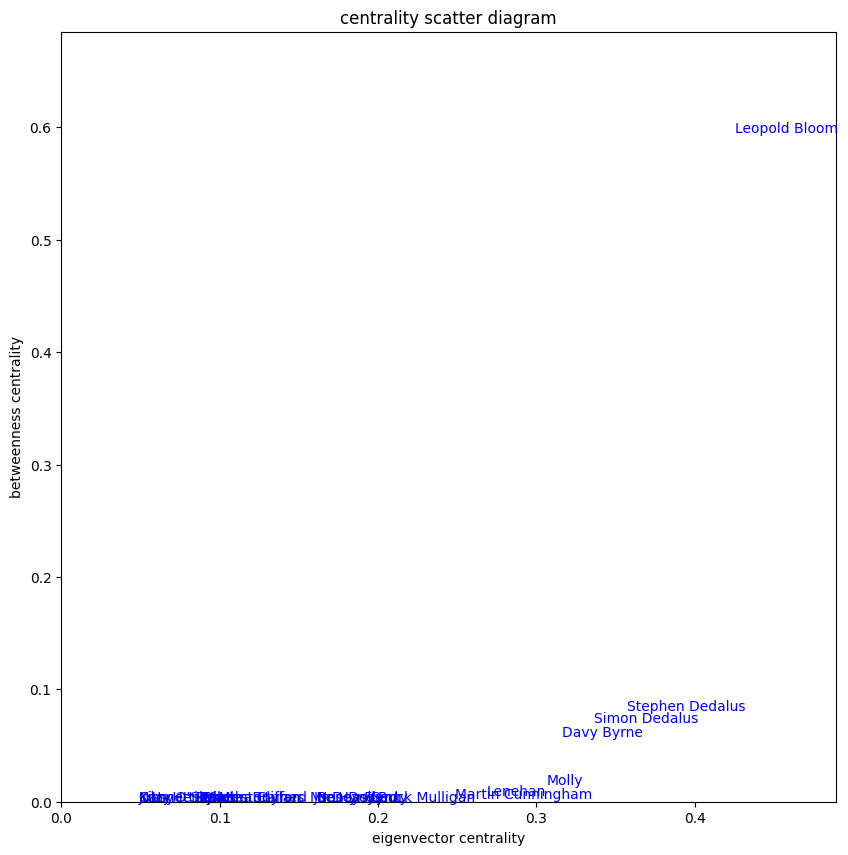

In [112]:
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

In [113]:
#Finding Similarity between nodes

preds = nx.jaccard_coefficient(Undirected_G)
for u, v, p in preds:
    print('(%s, %s) -> %.8f' % (u, v, p))

(Haines, Martin Cunningham) -> 0.42857143
(Haines, John Henry Menton) -> 0.33333333
(Haines, Nannetti) -> 0.33333333
(Haines, Martha Clifford) -> 0.25000000
(Haines, Mr Deasy) -> 0.40000000
(Haines, Lenehan) -> 0.37500000
(Haines, Gerty) -> 0.33333333
(Haines, Molly) -> 0.30000000
(Haines, Cissy) -> 0.33333333
(Haines, Stephen Dedalus) -> 0.21428571
(Haines, Blazes Boylan) -> 0.25000000
(Haines, Power) -> 0.66666667
(Haines, Bello) -> 0.66666667
(Haines, Kitty O'Shea) -> 0.33333333
(Haines, Joe Hynes) -> 0.40000000
(Haines, Nosey Flynn) -> 0.40000000
(Haines, Zoe) -> 0.66666667
(Haines, Buck Mulligan) -> 0.60000000
(Haines, Ben Dollard) -> 0.40000000
(Haines, Lynch) -> 0.66666667
(Mr Deasy, John Henry Menton) -> 0.25000000
(Mr Deasy, Nannetti) -> 0.25000000
(Mr Deasy, Martha Clifford) -> 0.50000000
(Mr Deasy, Lenehan) -> 0.50000000
(Mr Deasy, Gerty) -> 0.50000000
(Mr Deasy, Molly) -> 0.40000000
(Mr Deasy, Cissy) -> 0.25000000
(Mr Deasy, Blazes Boylan) -> 0.50000000
(Mr Deasy, Power) ->

In [114]:
preds = nx.adamic_adar_index(Undirected_G)
for u, v, p in preds:
    print('(%s, %s) -> %.8f' % (u, v, p))

(Haines, Martin Cunningham) -> 1.11122984
(Haines, John Henry Menton) -> 0.31892899
(Haines, Nannetti) -> 0.31892899
(Haines, Martha Clifford) -> 0.31892899
(Haines, Mr Deasy) -> 0.70880023
(Haines, Lenehan) -> 1.11122984
(Haines, Gerty) -> 0.70880023
(Haines, Molly) -> 1.11122984
(Haines, Cissy) -> 0.31892899
(Haines, Stephen Dedalus) -> 1.11122984
(Haines, Blazes Boylan) -> 0.31892899
(Haines, Power) -> 0.72135859
(Haines, Bello) -> 0.72135859
(Haines, Kitty O'Shea) -> 0.31892899
(Haines, Joe Hynes) -> 0.70880023
(Haines, Nosey Flynn) -> 0.72135859
(Haines, Zoe) -> 0.70880023
(Haines, Buck Mulligan) -> 1.11122984
(Haines, Ben Dollard) -> 0.72135859
(Haines, Lynch) -> 0.70880023
(Mr Deasy, John Henry Menton) -> 0.31892899
(Mr Deasy, Nannetti) -> 0.31892899
(Mr Deasy, Martha Clifford) -> 0.69785217
(Mr Deasy, Lenehan) -> 1.60162176
(Mr Deasy, Gerty) -> 1.08772342
(Mr Deasy, Molly) -> 1.60162176
(Mr Deasy, Cissy) -> 0.31892899
(Mr Deasy, Blazes Boylan) -> 0.69785217
(Mr Deasy, Power) ->

In [115]:
preds = nx.preferential_attachment(Undirected_G)
for u, v, p in preds:
    print('(%s, %s) -> %.8f' % (u, v, p))

(Haines, Martin Cunningham) -> 21.00000000
(Haines, John Henry Menton) -> 3.00000000
(Haines, Nannetti) -> 3.00000000
(Haines, Martha Clifford) -> 6.00000000
(Haines, Mr Deasy) -> 12.00000000
(Haines, Lenehan) -> 24.00000000
(Haines, Gerty) -> 15.00000000
(Haines, Molly) -> 30.00000000
(Haines, Cissy) -> 3.00000000
(Haines, Stephen Dedalus) -> 42.00000000
(Haines, Blazes Boylan) -> 6.00000000
(Haines, Power) -> 6.00000000
(Haines, Bello) -> 6.00000000
(Haines, Kitty O'Shea) -> 3.00000000
(Haines, Joe Hynes) -> 12.00000000
(Haines, Nosey Flynn) -> 12.00000000
(Haines, Zoe) -> 6.00000000
(Haines, Buck Mulligan) -> 15.00000000
(Haines, Ben Dollard) -> 12.00000000
(Haines, Lynch) -> 6.00000000
(Mr Deasy, John Henry Menton) -> 4.00000000
(Mr Deasy, Nannetti) -> 4.00000000
(Mr Deasy, Martha Clifford) -> 8.00000000
(Mr Deasy, Lenehan) -> 32.00000000
(Mr Deasy, Gerty) -> 20.00000000
(Mr Deasy, Molly) -> 40.00000000
(Mr Deasy, Cissy) -> 4.00000000
(Mr Deasy, Blazes Boylan) -> 8.00000000
(Mr Dea

In [116]:
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph.
synthetic = nx.make_max_clique_graph(Undirected_G)  
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), 

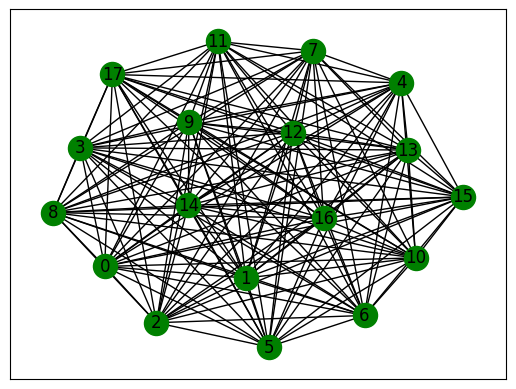

In [117]:
nx.draw_networkx(synthetic,node_color='green')

##2

##2A
THE CHARACTERS LEOPOLD BLOOM,STEPHEN DEDALUS,SIMON DEDALUS,DAVY BYRNE AND MOLLY SEEM TO BE THE PROTAGONISTS AT LARGE. 

##2B
A global clustering coefficient of 0.69693026377809 indicates the social network is highly clustered.

Gerty, Haines, Power, Bello, Lynch, Joe Hynes, Nosey Flynn, Blazes Boylan, Martha Clifford, Ben Dollard, and Buck Mulligan all have a local clustering coefficient of 1, indicating that their neighbors are highly interconnected, and they are likely to be part of tightly knit groups within the network.

Martin Cunningham also has a high local clustering coefficient of 0.857, indicating that his neighbors are also highly interconnected, but to a slightly lesser extent.

Molly has a moderately high clustering coefficient of 0.644, indicating that her neighbors are somewhat interconnected.

Leopold Bloom and Stephen Dedalus have lower clustering coefficients of 0.17 and 0.41 respectively, indicating that their neighbors are less tightly interconnected.

Some nodes, such as Cissy and Nannetti, have clustering coefficients of 0, indicating that they are not part of any tightly interconnected groups within the network.

Lenehan and Simon Dedalus have intermediate clustering coefficients of 0.79 and 0.42 respectively.

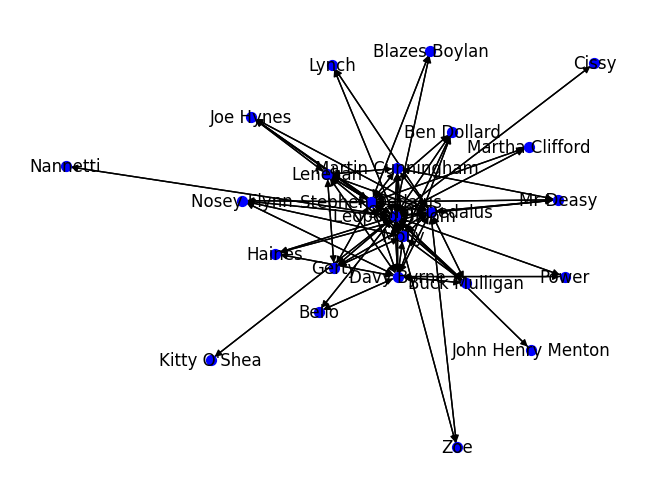

In [118]:
#EGO NETWORK
s='Leopold Bloom'
hub_ego=nx.ego_graph(G,s)
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)

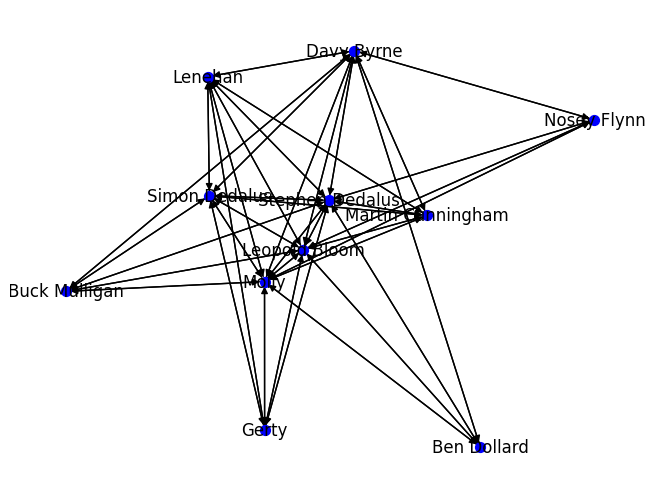

In [119]:
#EGO NETWORK
s='Molly'
hub_ego=nx.ego_graph(G,s)
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)

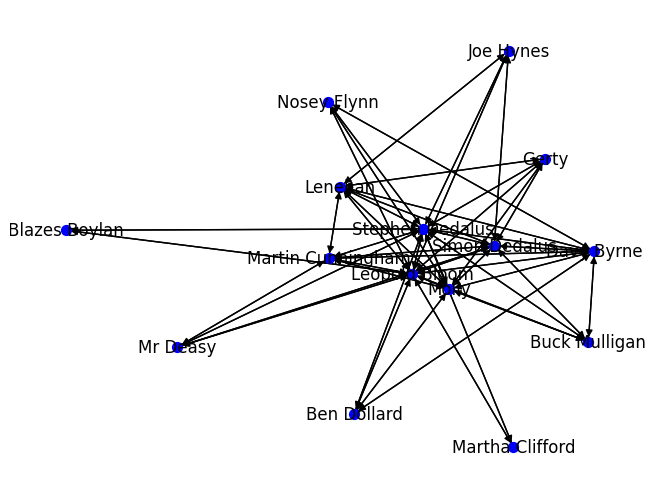

In [120]:
#EGO NETWORK
s='Stephen Dedalus'
hub_ego=nx.ego_graph(G,s)
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)

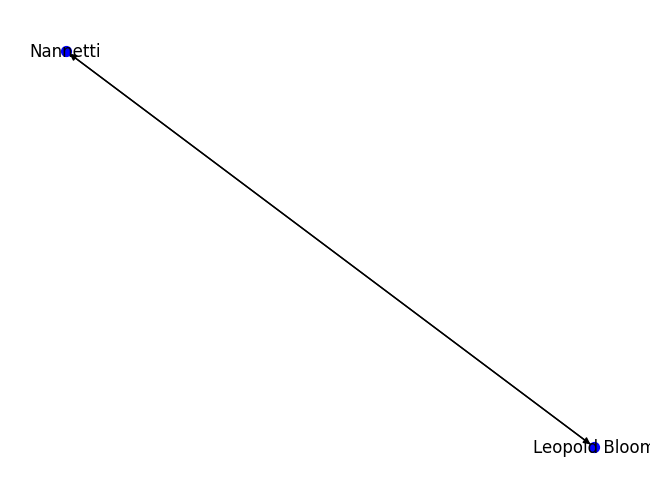

In [121]:
#EGO NETWORK
s='Nannetti'
hub_ego=nx.ego_graph(G,s)
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)

In [122]:
print(nx.transitivity(G))

0.415748031496063


The global clustering coefficient and transitivity are two related but distinct measures of the level of clustering and transitivity in a graph.

## 2C

* When comparing generated graphs to an actual social graph, there can be some differences in terms of the graph attributes such as degree distribution, clustering coefficient, and shortest path length.
* The G(n,p) and G(n,m) generated graphs tend to have a Poisson degree distribution, while the preferential attachment and small-world models tend to have a power-law degree distribution.Social graphs, on the other hand, often exhibit a heavy-tailed degree distribution with a few highly connected nodes and many poorly connected nodes.

YOU CAN SEE THE DIFFERENCES...ITS SO MUCH

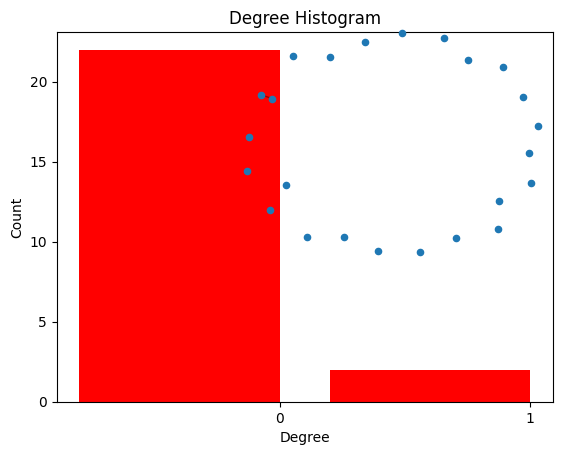

In [123]:
import collections

degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='Red')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G1.subgraph(c) for c in nx.connected_components(G1))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G1)
plt.axis('off')
nx.draw_networkx_nodes(G1, pos, node_size=20)
nx.draw_networkx_edges(G1, pos, alpha=0.4)

plt.show()


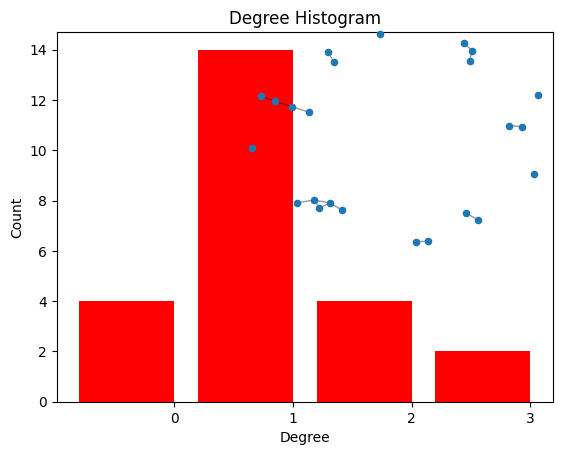

In [124]:
import collections

degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='Red')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G2.subgraph(c) for c in nx.connected_components(G2))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G2)
plt.axis('off')
nx.draw_networkx_nodes(G2, pos, node_size=20)
nx.draw_networkx_edges(G2, pos, alpha=0.4)

plt.show()


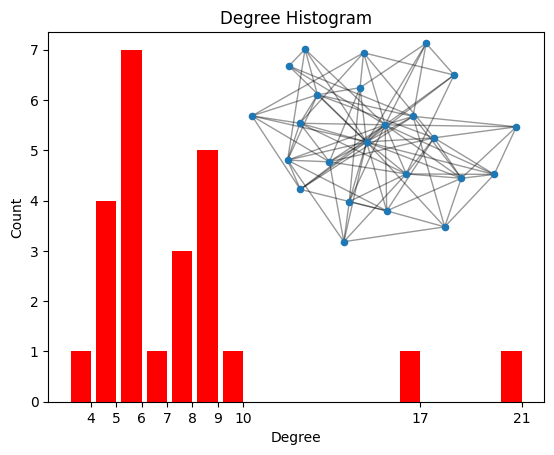

In [125]:
import collections

degree_sequence = sorted([d for n, d in H.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='Red')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (H.subgraph(c) for c in nx.connected_components(H))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(H)
plt.axis('off')
nx.draw_networkx_nodes(H, pos, node_size=20)
nx.draw_networkx_edges(H, pos, alpha=0.4)

plt.show()


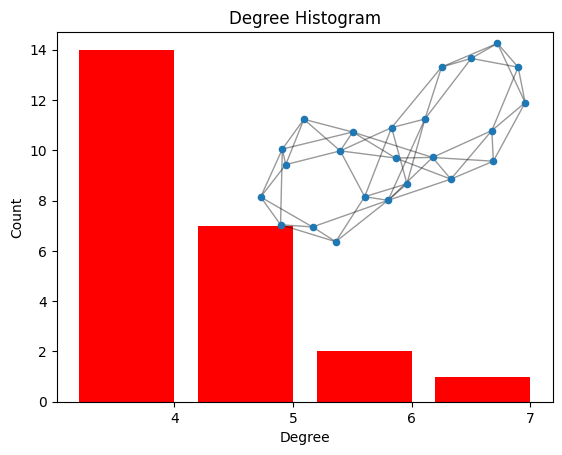

In [126]:
import collections

degree_sequence = sorted([d for n, d in N.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='Red')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (N.subgraph(c) for c in nx.connected_components(N))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(N)
plt.axis('off')
nx.draw_networkx_nodes(N, pos, node_size=20)
nx.draw_networkx_edges(N, pos, alpha=0.4)

plt.show()


* The G(n,p) and G(n,m) generated graphs have low clustering coefficients, while the preferential attachment and small-world models have higher clustering coefficients but still lower than those of social graphs.

In [127]:
nx.average_clustering(G)

0.69693026377809

In [128]:
nx.average_clustering(G1)

0.0

In [129]:
nx.average_clustering(G2)

0.06944444444444443

In [130]:
nx.average_clustering(H)

0.5035665655150949

In [131]:
nx.average_clustering(N)

0.47519841269841273

* Social graphs tend to have a small-world structure with a relatively small average shortest path length.The generated graphs tend to have longer average shortest path lengths compared to social graphs, with the small-world model having the shortest average path length of the three generated models.

In [132]:
nx.average_shortest_path_length(G)

1.7608695652173914

In [133]:
nx.average_shortest_path_length(H)

1.673913043478261

In [134]:
nx.average_shortest_path_length(N)

2.5144927536231885